## 2D linear systems

Noise: 0.0001
Optimized parameters: a=-0.1000, b=2.0000, c=-2.0000, d=-0.1000
True parameters: a=-0.1000, b=2.0000, c=-2.0000, d=-0.1000
MSE: 0.0000
RMSE: 0.0001
Noise: 0.001
Optimized parameters: a=-0.1000, b=1.9999, c=-2.0001, d=-0.1000
True parameters: a=-0.1000, b=2.0000, c=-2.0000, d=-0.1000
MSE: 0.0000
RMSE: 0.0010
Noise: 0.01
Optimized parameters: a=-0.0989, b=1.9999, c=-2.0001, d=-0.1010
True parameters: a=-0.1000, b=2.0000, c=-2.0000, d=-0.1000
MSE: 0.0001
RMSE: 0.0101
Noise: 0.1
Optimized parameters: a=-0.0973, b=2.0122, c=-1.9890, d=-0.1043
True parameters: a=-0.1000, b=2.0000, c=-2.0000, d=-0.1000
MSE: 0.0103
RMSE: 0.1014


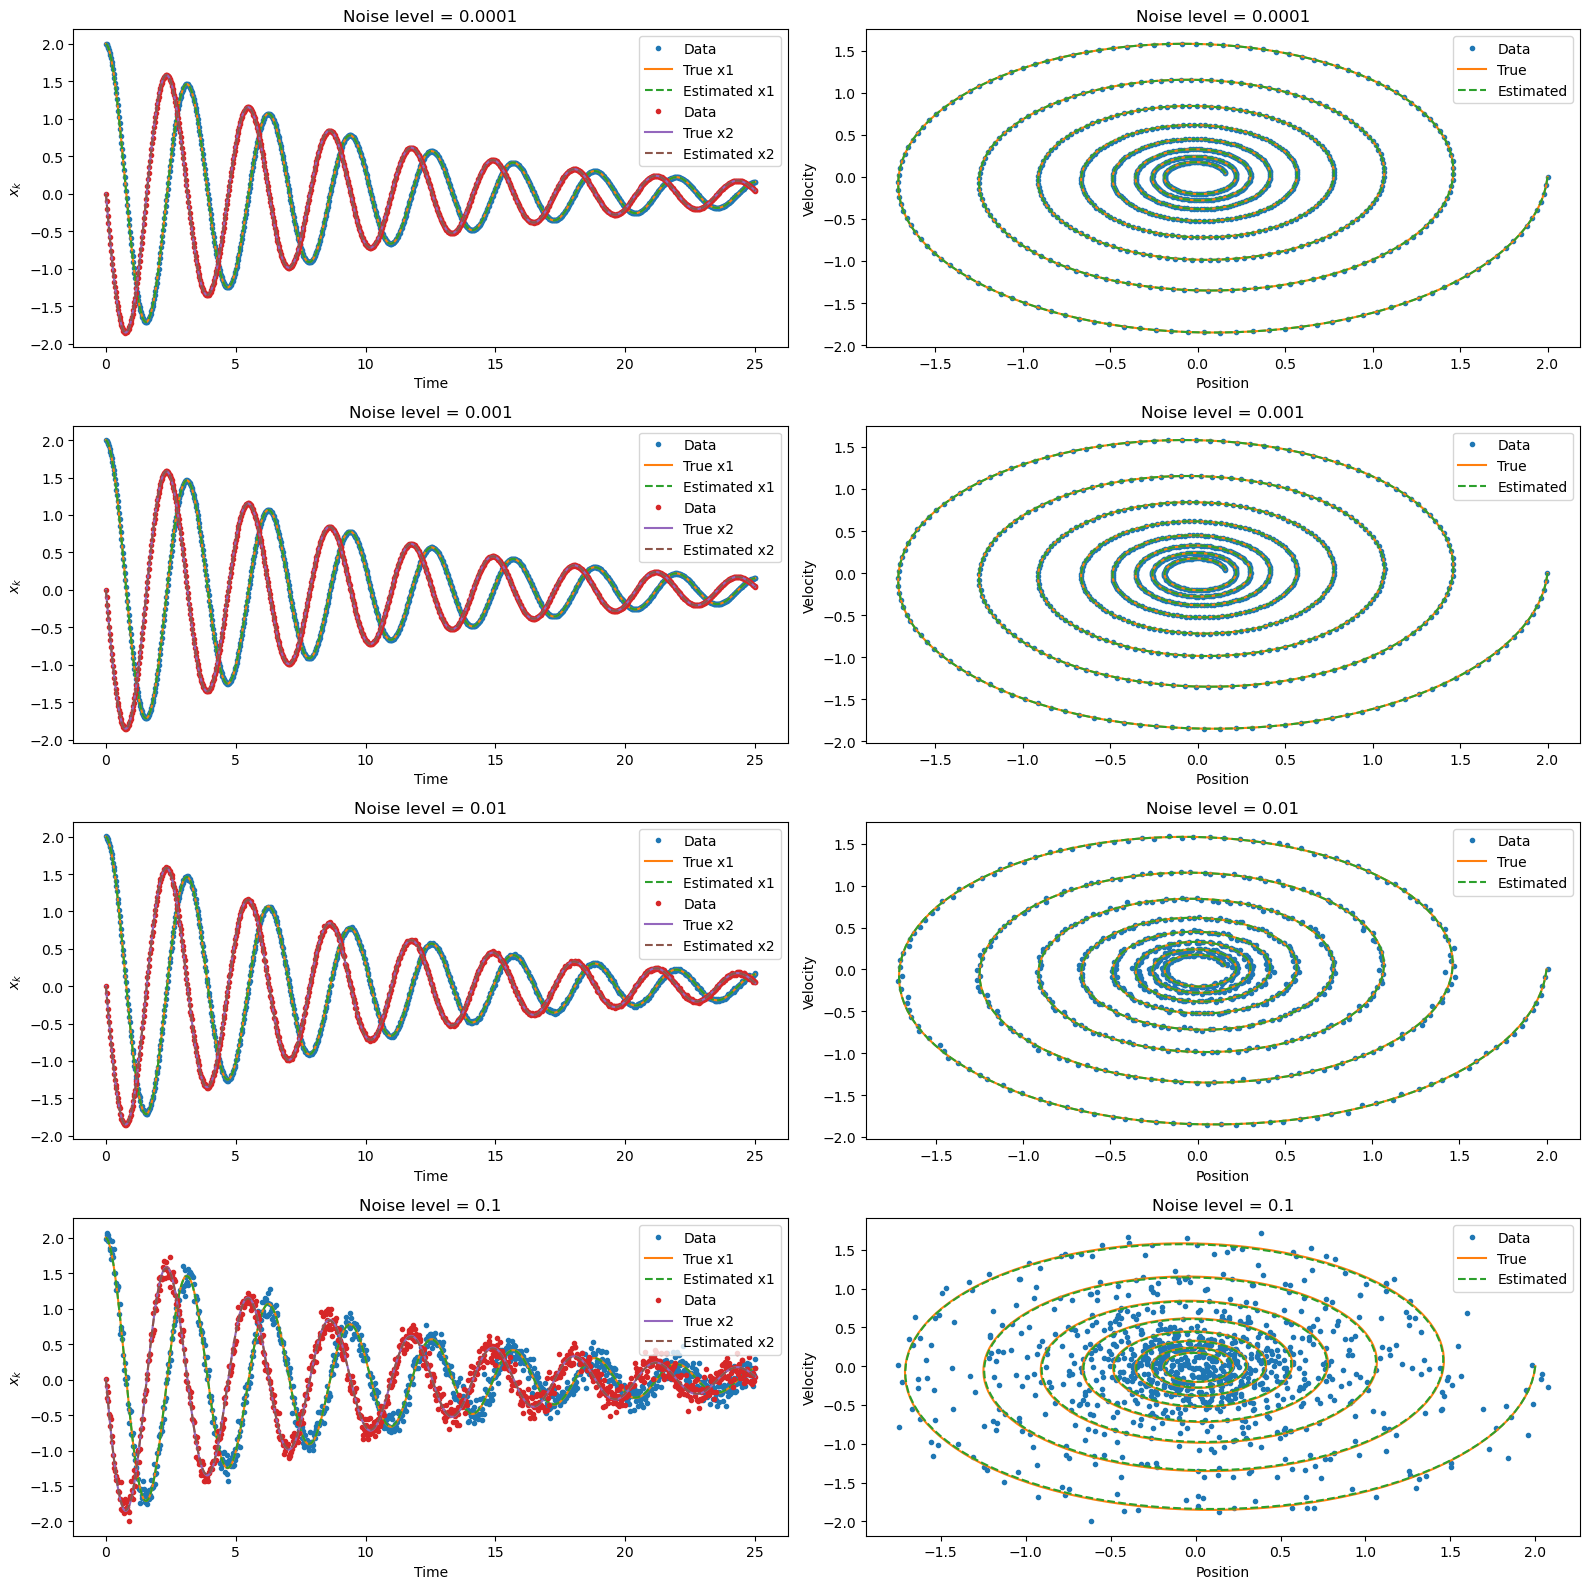

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define the function
def f(t, y, a, b, c, d):
    y1, y2 = y
    return np.array([a * y1 + b * y2, c * y1 + d * y2])

# Define the objective function
def objective(x, t, y_data):
    y0 = [2.0, 0.0]  # initial conditions
    sol = solve_ivp(lambda t, y: f(t, y, *x), [t[0], t[-1]], y0, t_eval=t)
    y_pred = sol.y
    return np.sum((y_data - y_pred) ** 2)

# Define parameters
a = -0.1
b = 2.0
c = -2
d = -0.1

t0 = 0.0
tmax = 25.0
y0 = np.array([2, 0])

# Generate noisy data for different noise levels
t = np.linspace(t0, tmax, 1000)

# Plot the results
fig, axs = plt.subplots(4, 2, figsize=(16, 16))
noises = [0.0001, 0.001, 0.01, 0.1]
for i, noise in enumerate(noises):
    row = i
    col = 0
    print(f"Noise: {noise}")
    y_true = solve_ivp(lambda t, y: f(t, y, a, b, c, d), [t0, tmax], y0, t_eval=t).y
    y_data = y_true + noise * np.random.randn(*y_true.shape)

    # Estimate the parameters using the trust region method
    x0 = [-0.087, 1.85, -1.85, -0.088]  # initial guess for a, b, c, d
    res = minimize(lambda x: objective(x, t, y_data), x0, method='trust-constr',
                   bounds=[(-1, None), (-10, None), (-10, None), (-1, None)])
    a_opt, b_opt, c_opt, d_opt = res.x
    print(f"Optimized parameters: a={a_opt:.4f}, b={b_opt:.4f}, c={c_opt:.4f}, d={d_opt:.4f}")
    print(f"True parameters: a={a:.4f}, b={b:.4f}, c={c:.4f}, d={d:.4f}")

    # Solve the differential equation using the optimized parameters
    y0 = np.array([2.0, 0.0])  # initial conditions
    sol = solve_ivp(lambda t, y: f(t, y, a_opt, b_opt, c_opt, d_opt), [t0, tmax], y0, t_eval=t)

    # Compute the MSE and RMSE
    mse = np.mean((y_data - sol.y) ** 2)
    rmse = np.sqrt(mse)
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")

    # Plot the results
    axs[row, col].plot(t, y_data[0], '.', label='Data')
    axs[row, col].plot(t, y_true[0], '-', label='True x1')
    axs[row, col].plot(t, sol.y[0], '--', label='Estimated x1')
    axs[row, col].plot(t, y_data[1], '.', label='Data')
    axs[row, col].plot(t, y_true[1], '-', label='True x2')
    axs[row, col].plot(t, sol.y[1], '--', label='Estimated x2')
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('$x_{k}$')
    #axs[row, col].set_title(f"Noise level = {noise}, RMSE = {rmse:.4f}, MSE = {mse:.4f}")
    axs[row, col].set_title(f"Noise level = {noise}")
    axs[row, col].legend()

    # Plot the position-velocity phase portrait
    ax = axs[row, col+1]
    ax.plot(y_data[0], y_data[1], '.', label='Data')
    ax.plot(y_true[0], y_true[1], '-', label='True')
    ax.plot(sol.y[0], sol.y[1], '--', label='Estimated')
    ax.set_title(f"Noise level = {noise}")
    ax.set_xlabel('Position')
    ax.set_ylabel('Velocity')
    ax.legend()

plt.tight_layout()
plt.show()

## Effect of gaussian noise with 10 iterations

Iteration: 1
Noise: 0.0001
Optimized parameters: a=-0.1000, b=2.0000, c=-2.0000, d=-0.1000
True parameters: a=-0.1000, b=2.0000, c=-2.0000, d=-0.1000
MSE: 0.0000
RMSE: 0.0001
Noise: 0.001
Optimized parameters: a=-0.1001, b=2.0001, c=-1.9999, d=-0.0999
True parameters: a=-0.1000, b=2.0000, c=-2.0000, d=-0.1000
MSE: 0.0000
RMSE: 0.0010
Noise: 0.01
Optimized parameters: a=-0.0990, b=2.0006, c=-1.9995, d=-0.1008
True parameters: a=-0.1000, b=2.0000, c=-2.0000, d=-0.1000
MSE: 0.0001
RMSE: 0.0100
Noise: 0.1
Optimized parameters: a=-0.0937, b=2.0073, c=-1.9921, d=-0.1062
True parameters: a=-0.1000, b=2.0000, c=-2.0000, d=-0.1000
MSE: 0.0094
RMSE: 0.0969
Iteration: 2
Noise: 0.0001
Optimized parameters: a=-0.1000, b=2.0000, c=-2.0000, d=-0.1000
True parameters: a=-0.1000, b=2.0000, c=-2.0000, d=-0.1000
MSE: 0.0000
RMSE: 0.0001
Noise: 0.001
Optimized parameters: a=-0.1001, b=2.0001, c=-1.9999, d=-0.0999
True parameters: a=-0.1000, b=2.0000, c=-2.0000, d=-0.1000
MSE: 0.0000
RMSE: 0.0010
Noise: 0.

/tmp/ipykernel_141767/4091992238.py:98: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


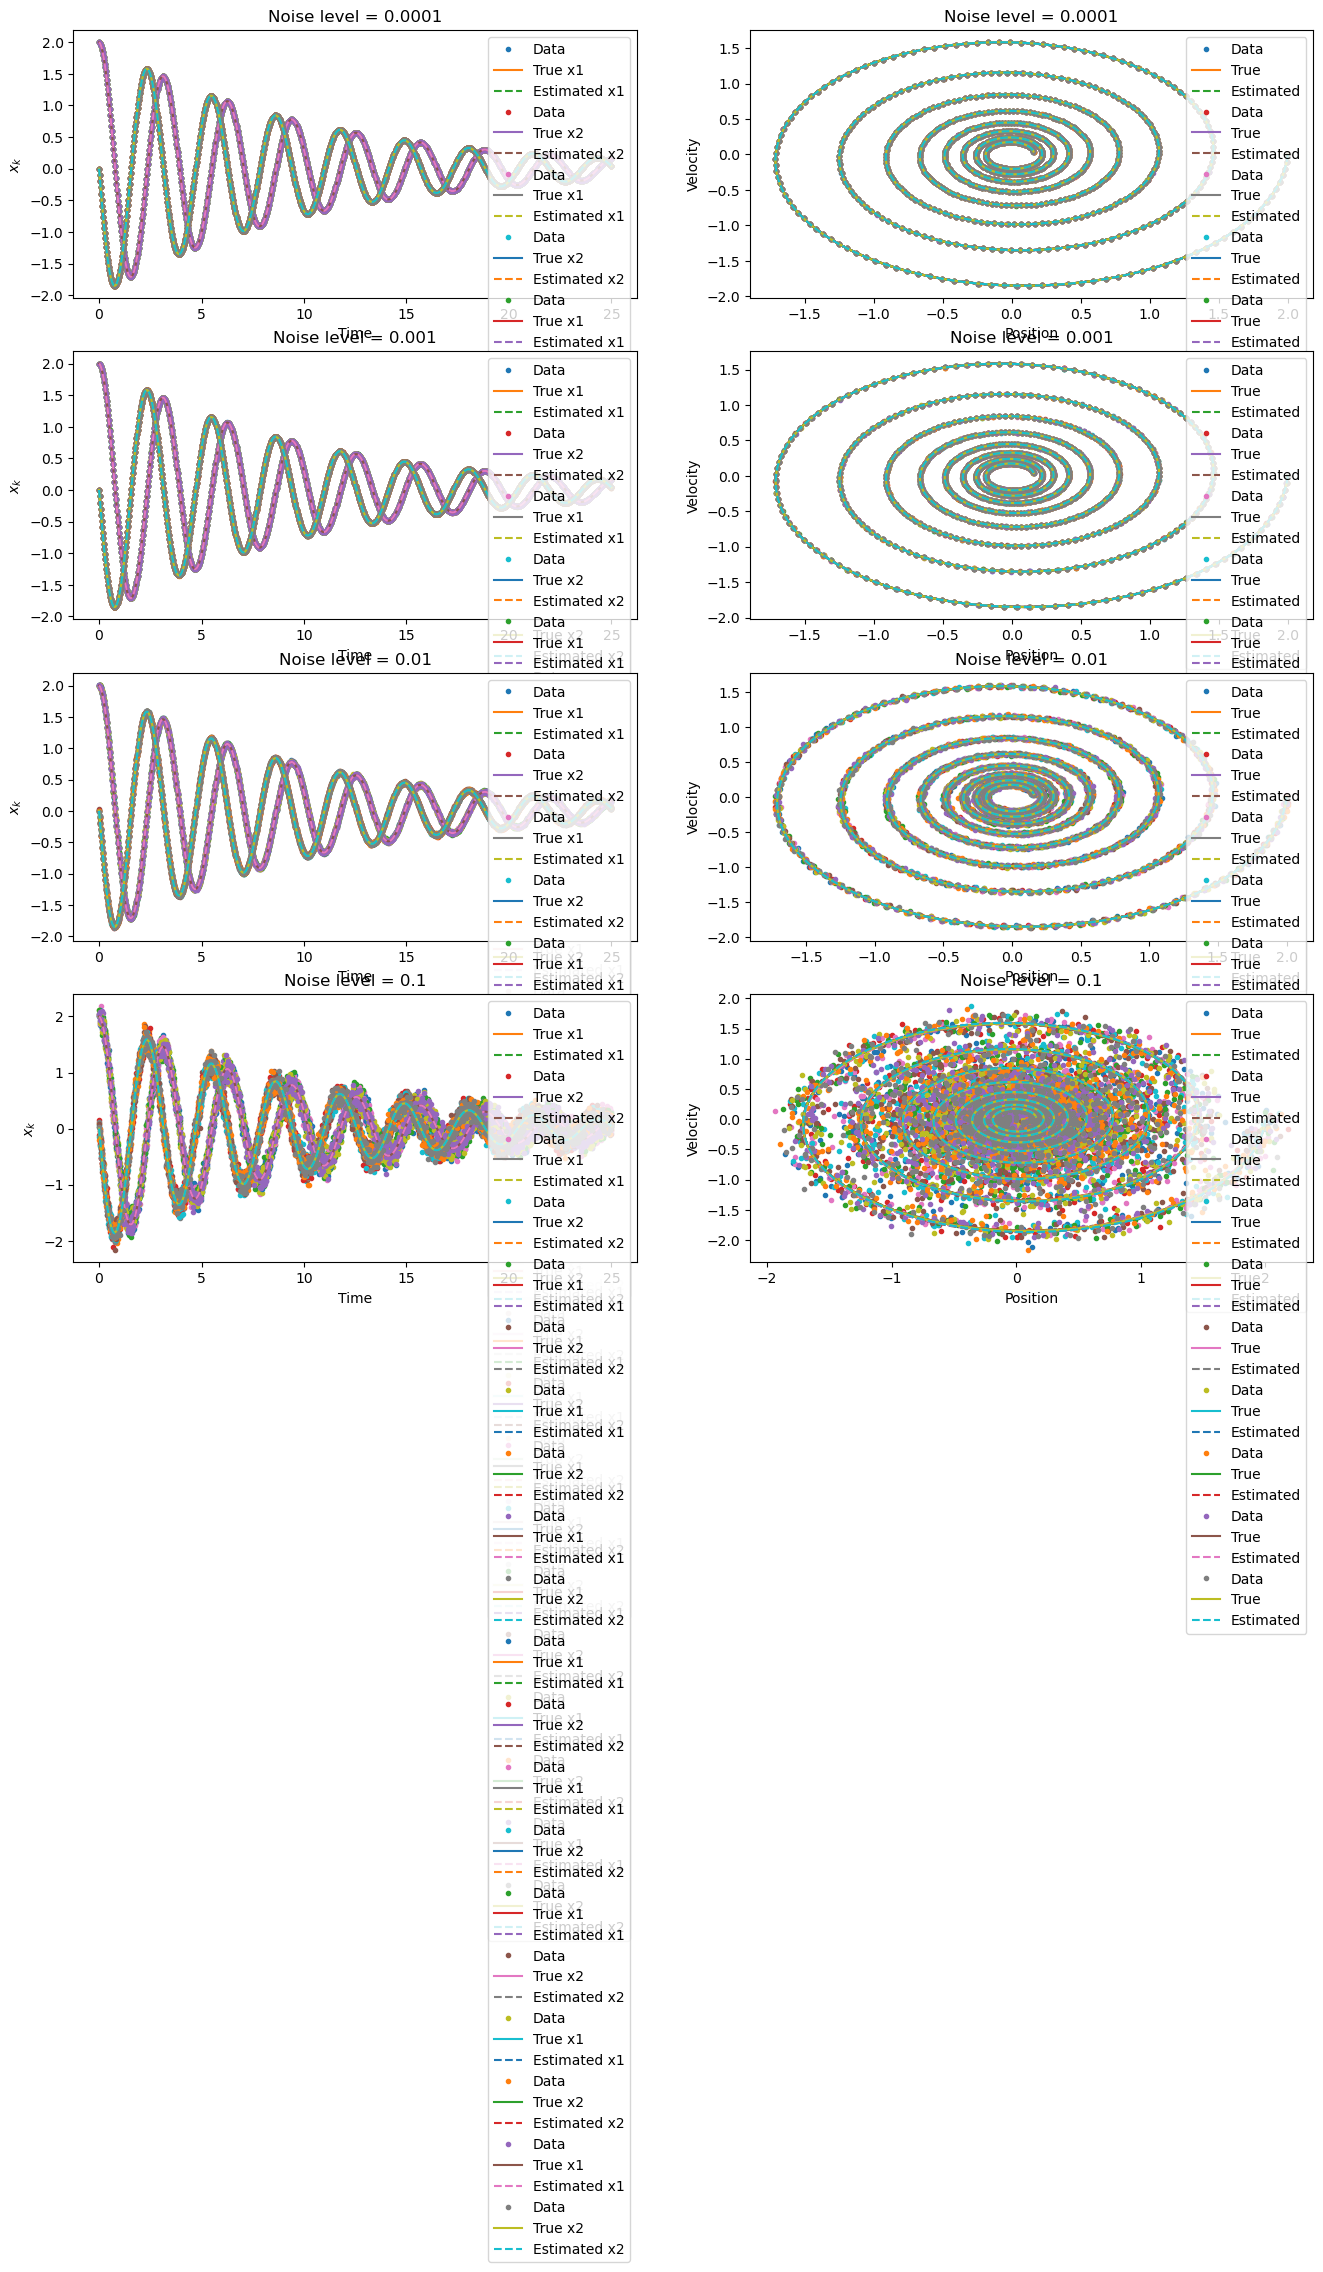

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define the function
def f(t, y, a, b, c, d):
    y1, y2 = y
    return np.array([a * y1 + b * y2, c * y1 + d * y2])

# Define the objective function
def objective(x, t, y_data):
    y0 = [2.0, 0.0]  # initial conditions
    sol = solve_ivp(lambda t, y: f(t, y, *x), [t[0], t[-1]], y0, t_eval=t)
    y_pred = sol.y
    return np.sum((y_data - y_pred) ** 2)

# Define parameters
a = -0.1
b = 2.0
c = -2
d = -0.1

t0 = 0.0
tmax = 25.0
y0 = np.array([2, 0])

# Generate noisy data for different noise levels
t = np.linspace(t0, tmax, 1000)

# Plot the results
fig, axs = plt.subplots(4, 2, figsize=(16, 16))
noises = [0.0001, 0.001, 0.01, 0.1]
num_iterations = 10
avg_mse = np.zeros(num_iterations)
avg_rmse = np.zeros(num_iterations)

for i in range(num_iterations):
    print(f"Iteration: {i+1}")
    mse_values = []
    rmse_values = []

    for j, noise in enumerate(noises):
        row = j
        col = 0
        print(f"Noise: {noise}")
        y_true = solve_ivp(lambda t, y: f(t, y, a, b, c, d), [t0, tmax], y0, t_eval=t).y
        y_data = y_true + noise * np.random.randn(*y_true.shape)

        # Estimate the parameters using the trust region method
        x0 = [-0.087, 1.85, -1.85, -0.088]  # initial guess for a, b, c, d
        res = minimize(lambda x: objective(x, t, y_data), x0, method='trust-constr',
                       bounds=[(-1, None), (-10, None), (-10, None), (-1, None)])
        a_opt, b_opt, c_opt, d_opt = res.x
        print(f"Optimized parameters: a={a_opt:.4f}, b={b_opt:.4f}, c={c_opt:.4f}, d={d_opt:.4f}")
        print(f"True parameters: a={a:.4f}, b={b:.4f}, c={c:.4f}, d={d:.4f}")

        # Solve the differential equation using the optimized parameters
        y0 = np.array([2.0, 0.0])  # initial conditions
        sol = solve_ivp(lambda t, y: f(t, y, a_opt, b_opt, c_opt, d_opt), [t0, tmax], y0, t_eval=t)

        # Compute the MSE and RMSE
        mse = np.mean((y_data - sol.y) ** 2)
        rmse = np.sqrt(mse)
        mse_values.append(mse)
        rmse_values.append(rmse)
        print(f"MSE: {mse:.4f}")
        print(f"RMSE: {rmse:.4f}")

        # Plot the results
        axs[row, col].plot(t, y_data[0], '.', label='Data')
        axs[row, col].plot(t, y_true[0], '-', label='True x1')
        axs[row, col].plot(t, sol.y[0], '--', label='Estimated x1')
        axs[row, col].plot(t, y_data[1], '.', label='Data')
        axs[row, col].plot(t, y_true[1], '-', label='True x2')
        axs[row, col].plot(t, sol.y[1], '--', label='Estimated x2')
        axs[row, col].set_xlabel('Time')
        axs[row, col].set_ylabel('$x_{k}$')
        axs[row, col].set_title(f"Noise level = {noise}")
        axs[row, col].legend()

        # Plot the position-velocity phase portrait
        ax = axs[row, col+1]
        ax.plot(y_data[0], y_data[1], '.', label='Data')
        ax.plot(y_true[0], y_true[1], '-', label='True')
        ax.plot(sol.y[0], sol.y[1], '--', label='Estimated')
        ax.set_title(f"Noise level = {noise}")
        ax.set_xlabel('Position')
        ax.set_ylabel('Velocity')
        ax.legend()

    avg_mse[i] = np.mean(mse_values)
    avg_rmse[i] = np.mean(rmse_values)

print(f"Average MSE: {np.mean(avg_mse):.4f}")
print(f"Average RMSE: {np.mean(avg_rmse):.4f}")

plt.tight_layout()
plt.show()


Iteration: 1
Noise: 0.0001
Optimized parameters: a=-0.1000, b=2.0000, c=-2.0000, d=-0.1000
True parameters: a=-0.1000, b=2.0000, c=-2.0000, d=-0.1000
MSE: 0.0000
RMSE: 0.0001
Noise: 0.001
Optimized parameters: a=-0.0999, b=1.9999, c=-2.0001, d=-0.1001
True parameters: a=-0.1000, b=2.0000, c=-2.0000, d=-0.1000
MSE: 0.0000
RMSE: 0.0010
Noise: 0.01
Optimized parameters: a=-0.0984, b=2.0030, c=-1.9971, d=-0.1014
True parameters: a=-0.1000, b=2.0000, c=-2.0000, d=-0.1000
MSE: 0.0001
RMSE: 0.0103
Noise: 0.1
Optimized parameters: a=-0.0983, b=2.0009, c=-1.9983, d=-0.1024
True parameters: a=-0.1000, b=2.0000, c=-2.0000, d=-0.1000
MSE: 0.0100
RMSE: 0.1002
Iteration: 2
Noise: 0.0001
Optimized parameters: a=-0.1000, b=2.0000, c=-2.0000, d=-0.1000
True parameters: a=-0.1000, b=2.0000, c=-2.0000, d=-0.1000
MSE: 0.0000
RMSE: 0.0001
Noise: 0.001
Optimized parameters: a=-0.1001, b=2.0001, c=-1.9999, d=-0.0998
True parameters: a=-0.1000, b=2.0000, c=-2.0000, d=-0.1000
MSE: 0.0000
RMSE: 0.0010
Noise: 0.

/home/zesus/anaconda3/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


Optimized parameters: a=-0.0957, b=2.0140, c=-1.9853, d=-0.1026
True parameters: a=-0.1000, b=2.0000, c=-2.0000, d=-0.1000
MSE: 0.0102
RMSE: 0.1011
Iteration: 10
Noise: 0.0001
Optimized parameters: a=-0.1000, b=2.0000, c=-2.0000, d=-0.1000
True parameters: a=-0.1000, b=2.0000, c=-2.0000, d=-0.1000
MSE: 0.0000
RMSE: 0.0001
Noise: 0.001
Optimized parameters: a=-0.1000, b=2.0000, c=-2.0000, d=-0.1000
True parameters: a=-0.1000, b=2.0000, c=-2.0000, d=-0.1000
MSE: 0.0000
RMSE: 0.0010
Noise: 0.01
Optimized parameters: a=-0.0988, b=1.9987, c=-2.0014, d=-0.1013
True parameters: a=-0.1000, b=2.0000, c=-2.0000, d=-0.1000
MSE: 0.0001
RMSE: 0.0101
Noise: 0.1
Optimized parameters: a=-0.1066, b=2.0071, c=-1.9929, d=-0.0922
True parameters: a=-0.1000, b=2.0000, c=-2.0000, d=-0.1000
MSE: 0.0109
RMSE: 0.1044

Average Estimated Parameters:
a_opt: -0.1013
b_opt: 2.0009
c_opt: -1.9990
d_opt: -0.0985

Average MSE: 0.0026
Average RMSE: 0.0279


/tmp/ipykernel_141767/1316187088.py:119: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


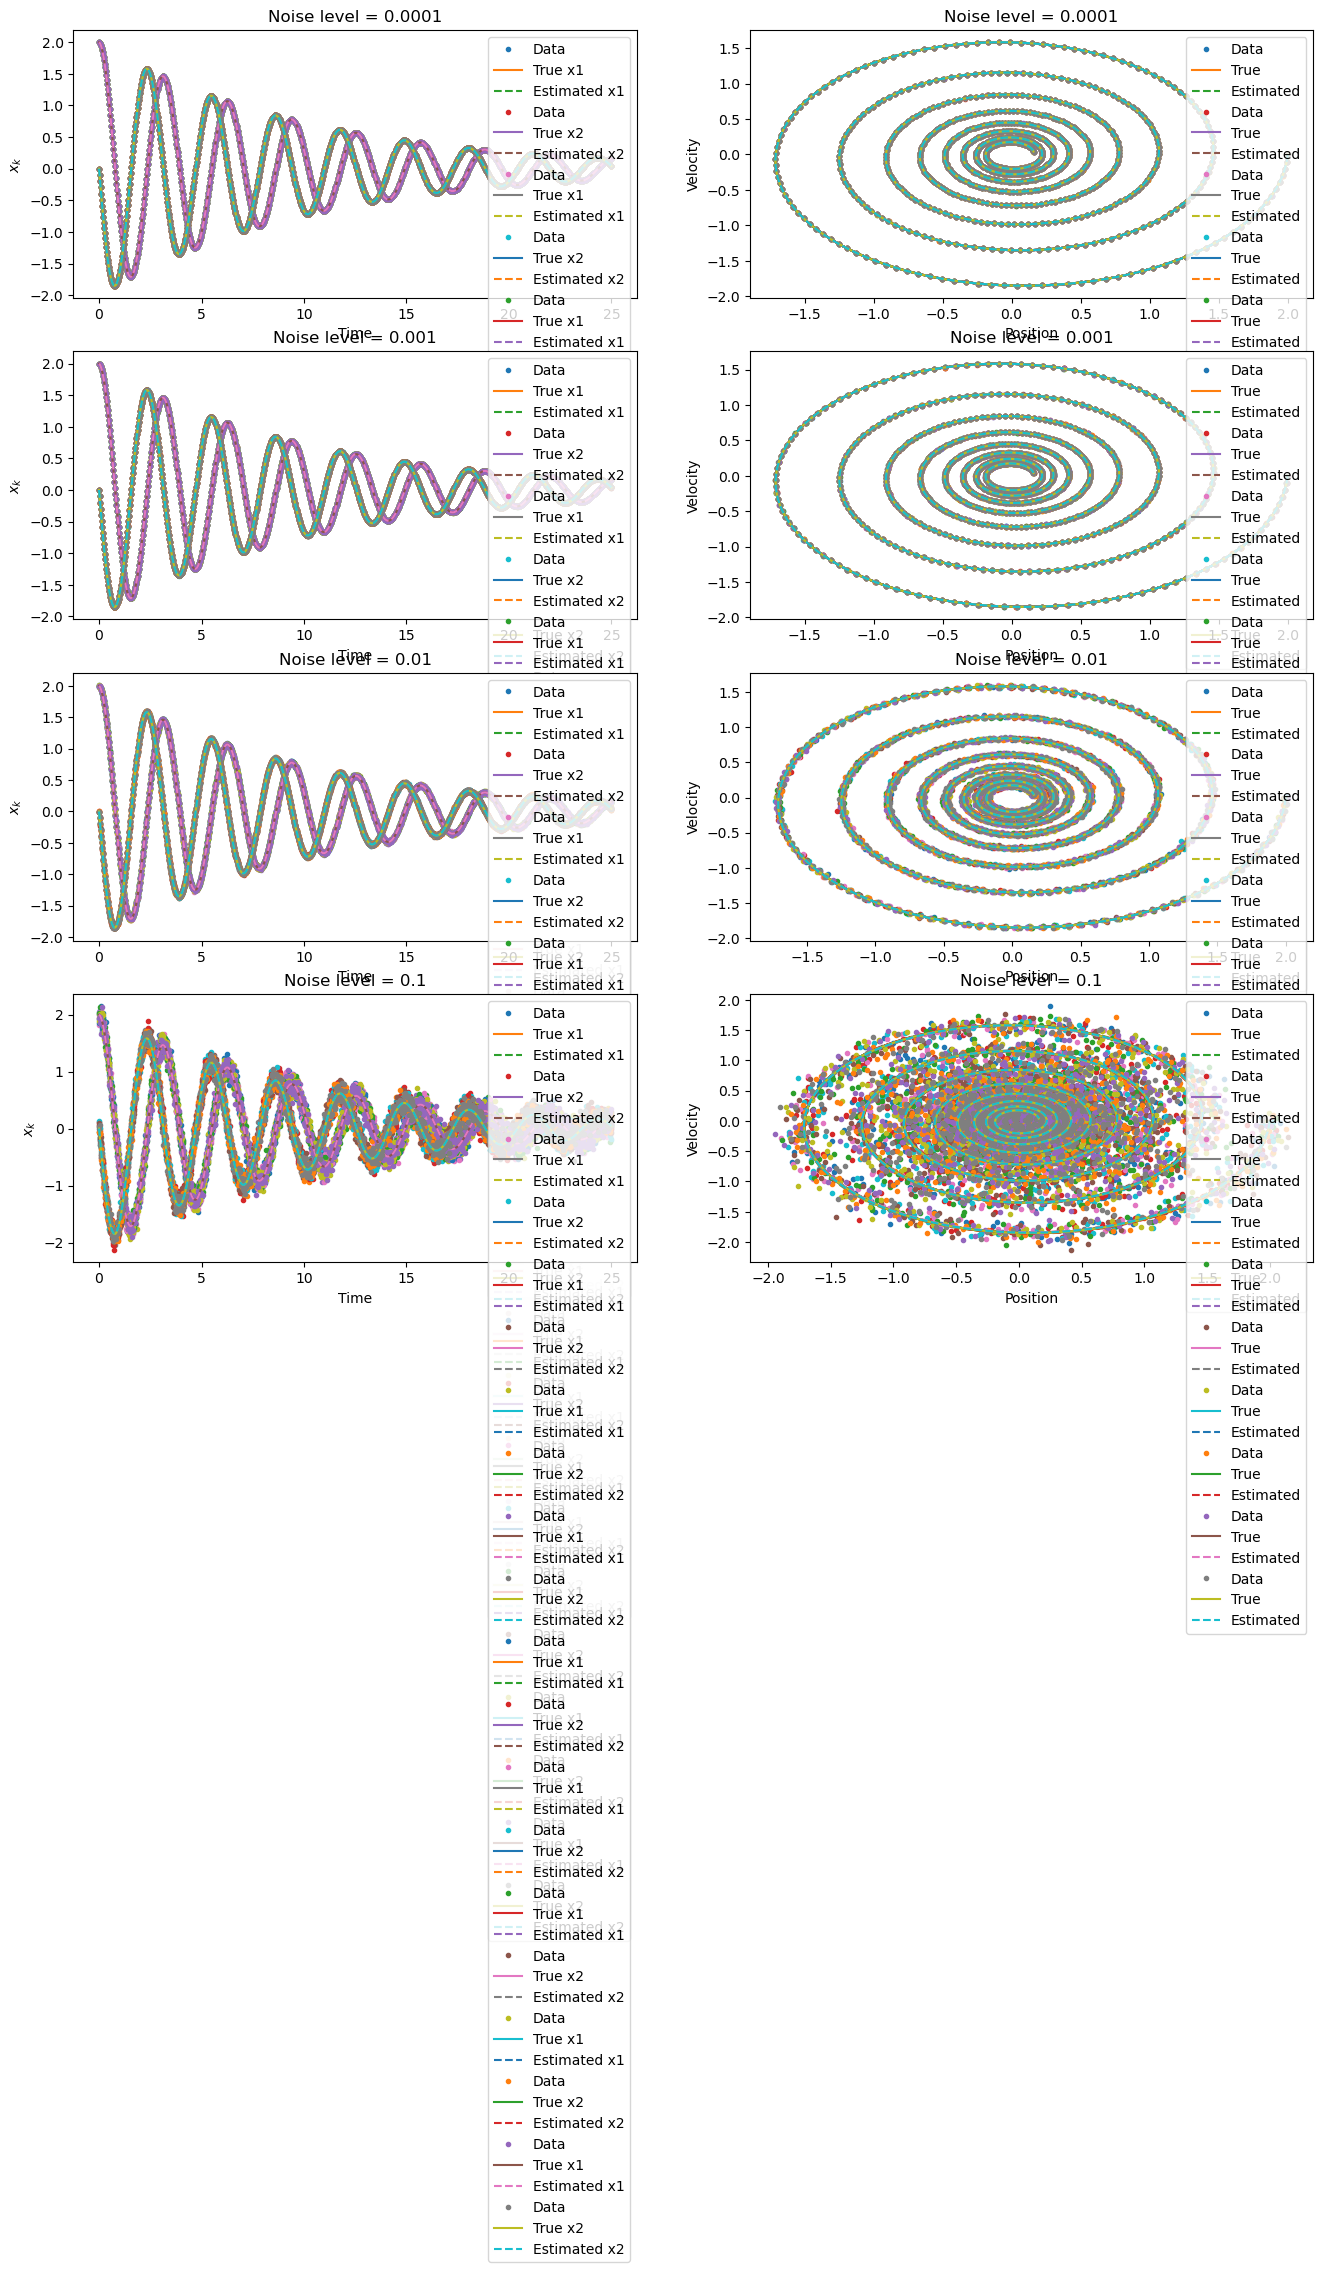

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define the function
def f(t, y, a, b, c, d):
    y1, y2 = y
    return np.array([a * y1 + b * y2, c * y1 + d * y2])

# Define the objective function
def objective(x, t, y_data):
    y0 = [2.0, 0.0]  # initial conditions
    sol = solve_ivp(lambda t, y: f(t, y, *x), [t[0], t[-1]], y0, t_eval=t)
    y_pred = sol.y
    return np.sum((y_data - y_pred) ** 2)

# Define parameters
a = -0.1
b = 2.0
c = -2
d = -0.1

t0 = 0.0
tmax = 25.0
y0 = np.array([2, 0])

# Generate noisy data for different noise levels
t = np.linspace(t0, tmax, 1000)

# Plot the results
fig, axs = plt.subplots(4, 2, figsize=(16, 16))
noises = [0.0001, 0.001, 0.01, 0.1]
num_iterations = 10
avg_mse = np.zeros(num_iterations)
avg_rmse = np.zeros(num_iterations)

avg_a_opt = 0.0
avg_b_opt = 0.0
avg_c_opt = 0.0
avg_d_opt = 0.0

for i in range(num_iterations):
    print(f"Iteration: {i+1}")
    mse_values = []
    rmse_values = []

    for j, noise in enumerate(noises):
        row = j
        col = 0
        print(f"Noise: {noise}")
        y_true = solve_ivp(lambda t, y: f(t, y, a, b, c, d), [t0, tmax], y0, t_eval=t).y
        y_data = y_true + noise * np.random.randn(*y_true.shape)

        # Estimate the parameters using the trust region method
        x0 = [-0.087, 1.85, -1.85, -0.088]  # initial guess for a, b, c, d
        res = minimize(lambda x: objective(x, t, y_data), x0, method='trust-constr',
                       bounds=[(-1, None), (-10, None), (-10, None), (-1, None)])
        a_opt, b_opt, c_opt, d_opt = res.x
        avg_a_opt += a_opt
        avg_b_opt += b_opt
        avg_c_opt += c_opt
        avg_d_opt += d_opt

        print(f"Optimized parameters: a={a_opt:.4f}, b={b_opt:.4f}, c={c_opt:.4f}, d={d_opt:.4f}")
        print(f"True parameters: a={a:.4f}, b={b:.4f}, c={c:.4f}, d={d:.4f}")

        # Solve the differential equation using the optimized parameters
        y0 = np.array([2.0, 0.0])  # initial conditions
        sol = solve_ivp(lambda t, y: f(t, y, a_opt, b_opt, c_opt, d_opt), [t0, tmax], y0, t_eval=t)

        # Compute the MSE and RMSE
        mse = np.mean((y_data - sol.y) ** 2)
        rmse = np.sqrt(mse)
        mse_values.append(mse)
        rmse_values.append(rmse)
        print(f"MSE: {mse:.4f}")
        print(f"RMSE: {rmse:.4f}")

        # Plot the results
        axs[row, col].plot(t, y_data[0], '.', label='Data')
        axs[row, col].plot(t, y_true[0], '-', label='True x1')
        axs[row, col].plot(t, sol.y[0], '--', label='Estimated x1')
        axs[row, col].plot(t, y_data[1], '.', label='Data')
        axs[row, col].plot(t, y_true[1], '-', label='True x2')
        axs[row, col].plot(t, sol.y[1], '--', label='Estimated x2')
        axs[row, col].set_xlabel('Time')
        axs[row, col].set_ylabel('$x_{k}$')
        axs[row, col].set_title(f"Noise level = {noise}")
        axs[row, col].legend()

        # Plot the position-velocity phase portrait
        ax = axs[row, col+1]
        ax.plot(y_data[0], y_data[1], '.', label='Data')
        ax.plot(y_true[0], y_true[1], '-', label='True')
        ax.plot(sol.y[0], sol.y[1], '--', label='Estimated')
        ax.set_title(f"Noise level = {noise}")
        ax.set_xlabel('Position')
        ax.set_ylabel('Velocity')
        ax.legend()

    avg_mse[i] = np.mean(mse_values)
    avg_rmse[i] = np.mean(rmse_values)

avg_a_opt /= (num_iterations * len(noises))
avg_b_opt /= (num_iterations * len(noises))
avg_c_opt /= (num_iterations * len(noises))
avg_d_opt /= (num_iterations * len(noises))

print(f"\nAverage Estimated Parameters:")
print(f"a_opt: {avg_a_opt:.4f}")
print(f"b_opt: {avg_b_opt:.4f}")
print(f"c_opt: {avg_c_opt:.4f}")
print(f"d_opt: {avg_d_opt:.4f}")

print(f"\nAverage MSE: {np.mean(avg_mse):.4f}")
print(f"Average RMSE: {np.mean(avg_rmse):.4f}")

plt.tight_layout()
plt.show()


## Effect of colored noise (pink noise)

Noise: 0.0001


/tmp/ipykernel_141767/3546840924.py:47: RuntimeWarning: divide by zero encountered in true_divide
  power_spectrum = np.sqrt(1 / np.abs(freq))


Optimized parameters: a=-0.1000, b=2.0000, c=-2.0000, d=-0.1000
True parameters: a=-0.1000, b=2.0000, c=-2.0000, d=-0.1000
MSE: 0.0000
RMSE: 0.0001
Noise: 0.001
Optimized parameters: a=-0.1000, b=2.0001, c=-1.9999, d=-0.1000
True parameters: a=-0.1000, b=2.0000, c=-2.0000, d=-0.1000
MSE: 0.0000
RMSE: 0.0005
Noise: 0.01
Optimized parameters: a=-0.1009, b=1.9995, c=-2.0005, d=-0.0990
True parameters: a=-0.1000, b=2.0000, c=-2.0000, d=-0.1000
MSE: 0.0000
RMSE: 0.0060
Noise: 0.1
Optimized parameters: a=-0.0832, b=2.0160, c=-1.9846, d=-0.1167
True parameters: a=-0.1000, b=2.0000, c=-2.0000, d=-0.1000
MSE: 0.0028
RMSE: 0.0527


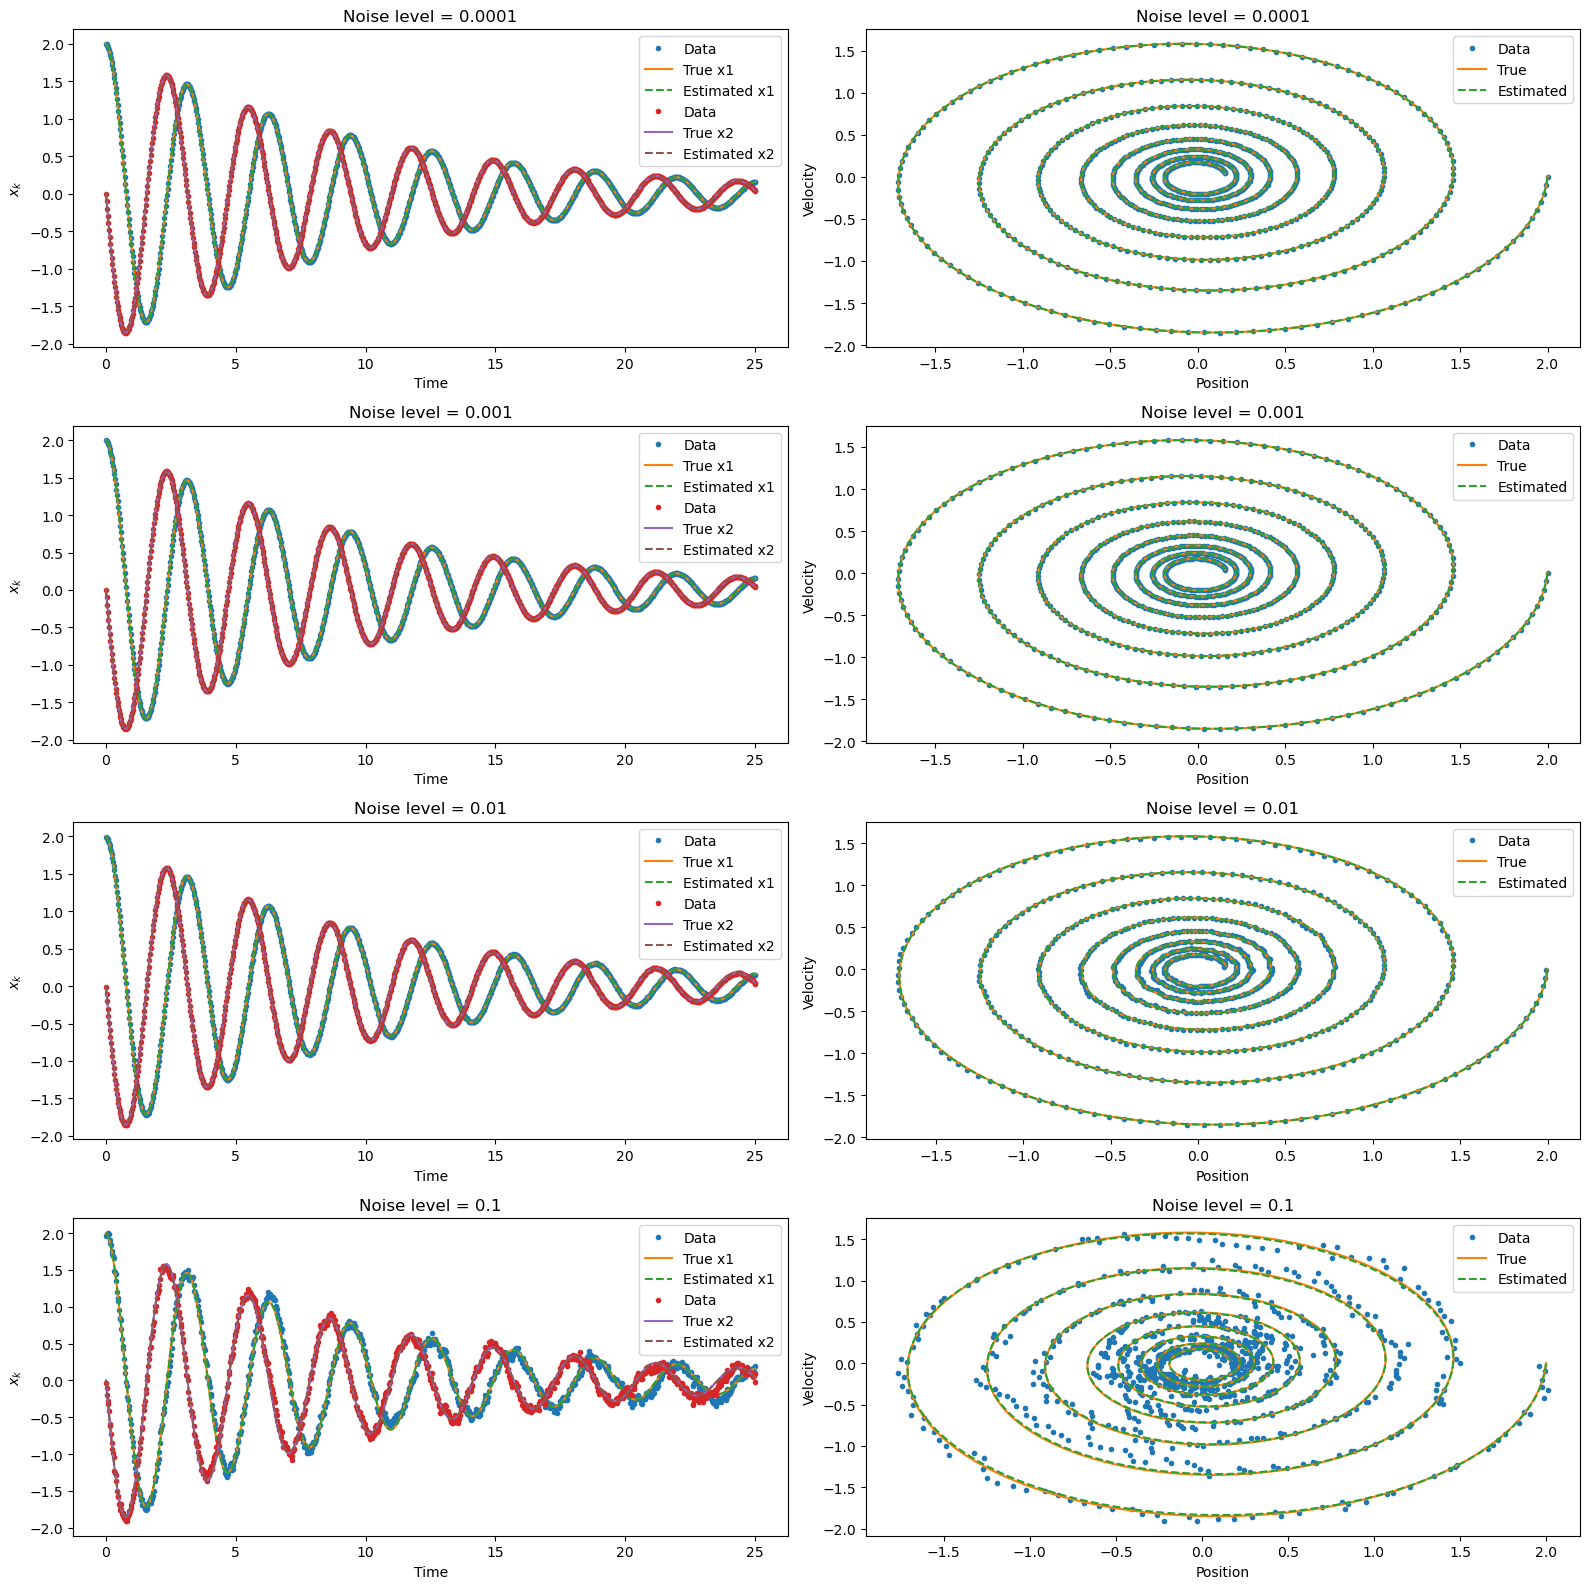

In [4]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt


# Define the function
def f(t, y, a, b, c, d):
    y1, y2 = y
    return np.array([a * y1 + b * y2, c * y1 + d * y2])


# Define the objective function
def objective(x, t, y_data):
    y0 = [2.0, 0.0]  # initial conditions
    sol = solve_ivp(lambda t, y: f(t, y, *x), [t[0], t[-1]], y0, t_eval=t)
    y_pred = sol.y
    return np.sum((y_data - y_pred) ** 2)


# Define parameters
a = -0.1
b = 2.0
c = -2
d = -0.1

t0 = 0.0
tmax = 25.0
y0 = np.array([2, 0])

# Generate noisy data for different noise levels
t = np.linspace(t0, tmax, 1000)

# Plot the results
fig, axs = plt.subplots(4, 2, figsize=(16, 16))
noises = [0.0001, 0.001, 0.01, 0.1]
for i, noise in enumerate(noises):
    row = i
    col = 0
    print(f"Noise: {noise}")
    y_true = solve_ivp(lambda t, y: f(t, y, a, b, c, d), [t0, tmax], y0, t_eval=t).y

    # Generate colored noise (pink noise)
    n = len(t)
    dt = t[1] - t[0]
    freq = np.fft.fftfreq(n, dt)
    power_spectrum = np.sqrt(1 / np.abs(freq))
    power_spectrum[0] = 0
    colored_noise = np.fft.ifft(np.fft.fft(np.random.normal(0, 1, n)) * power_spectrum).real

    desired_length = y_true.shape[1]  # Adjusted to match the length of the true solution
    y_data = y_true + noise * colored_noise

    # Estimate the parameters using the trust region method
    x0 = [-0.087, 1.85, -1.85, -0.088]  # initial guess for a, b, c, d
    res = minimize(lambda x: objective(x, t, y_data), x0, method='trust-constr',
                   bounds=[(-1, None), (-10, None), (-10, None), (-1, None)])
    a_opt, b_opt, c_opt, d_opt = res.x
    print(f"Optimized parameters: a={a_opt:.4f}, b={b_opt:.4f}, c={c_opt:.4f}, d={d_opt:.4f}")
    print(f"True parameters: a={a:.4f}, b={b:.4f}, c={c:.4f}, d={d:.4f}")

    # Solve the differential equation using the optimized parameters
    y0 = np.array([2.0, 0.0])  # initial conditions
    sol = solve_ivp(lambda t, y: f(t, y, a_opt, b_opt, c_opt, d_opt), [t0, tmax], y0, t_eval=t)

    # Compute the MSE and RMSE
    mse = np.mean((y_data - sol.y) ** 2)
    rmse = np.sqrt(mse)
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")

    # Plot the results
    axs[row, col].plot(t, y_data[0], '.', label='Data')
    axs[row, col].plot(t, y_true[0], '-', label='True x1')
    axs[row, col].plot(t, sol.y[0], '--', label='Estimated x1')
    axs[row, col].plot(t, y_data[1], '.', label='Data')
    axs[row, col].plot(t, y_true[1], '-', label='True x2')
    axs[row, col].plot(t, sol.y[1], '--', label='Estimated x2')
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('$x_{k}$')
    axs[row, col].set_title(f"Noise level = {noise}")
    axs[row, col].legend()

    # Plot the position-velocity phase portrait
    ax = axs[row, col+1]
    ax.plot(y_data[0], y_data[1], '.', label='Data')
    ax.plot(y_true[0], y_true[1], '-', label='True')
    ax.plot(sol.y[0], sol.y[1], '--', label='Estimated')
    ax.set_title(f"Noise level = {noise}")
    ax.set_xlabel('Position')
    ax.set_ylabel('Velocity')
    ax.legend()

plt.tight_layout()
plt.show()


Iteration: 1
Noise: 0.0001


/tmp/ipykernel_141767/3751995979.py:63: RuntimeWarning: divide by zero encountered in true_divide
  power_spectrum = np.sqrt(1 / np.abs(freq))


Optimized parameters: a=-0.1000, b=2.0000, c=-2.0000, d=-0.1000
True parameters: a=-0.1000, b=2.0000, c=-2.0000, d=-0.1000
MSE: 0.0000
RMSE: 0.0001
Noise: 0.001
Optimized parameters: a=-0.0996, b=2.0005, c=-1.9995, d=-0.1004
True parameters: a=-0.1000, b=2.0000, c=-2.0000, d=-0.1000
MSE: 0.0000
RMSE: 0.0005
Noise: 0.01
Optimized parameters: a=-0.0965, b=2.0035, c=-1.9966, d=-0.1034
True parameters: a=-0.1000, b=2.0000, c=-2.0000, d=-0.1000
MSE: 0.0000
RMSE: 0.0054
Noise: 0.1
Optimized parameters: a=-0.1542, b=1.9671, c=-2.0309, d=-0.0454
True parameters: a=-0.1000, b=2.0000, c=-2.0000, d=-0.1000
MSE: 0.0036
RMSE: 0.0598
Iteration: 2
Noise: 0.0001
Optimized parameters: a=-0.1000, b=2.0000, c=-2.0000, d=-0.1000
True parameters: a=-0.1000, b=2.0000, c=-2.0000, d=-0.1000
MSE: 0.0000
RMSE: 0.0001
Noise: 0.001
Optimized parameters: a=-0.1001, b=1.9996, c=-2.0004, d=-0.0999
True parameters: a=-0.1000, b=2.0000, c=-2.0000, d=-0.1000
MSE: 0.0000
RMSE: 0.0005
Noise: 0.01
Optimized parameters: a=

/tmp/ipykernel_141767/3751995979.py:129: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


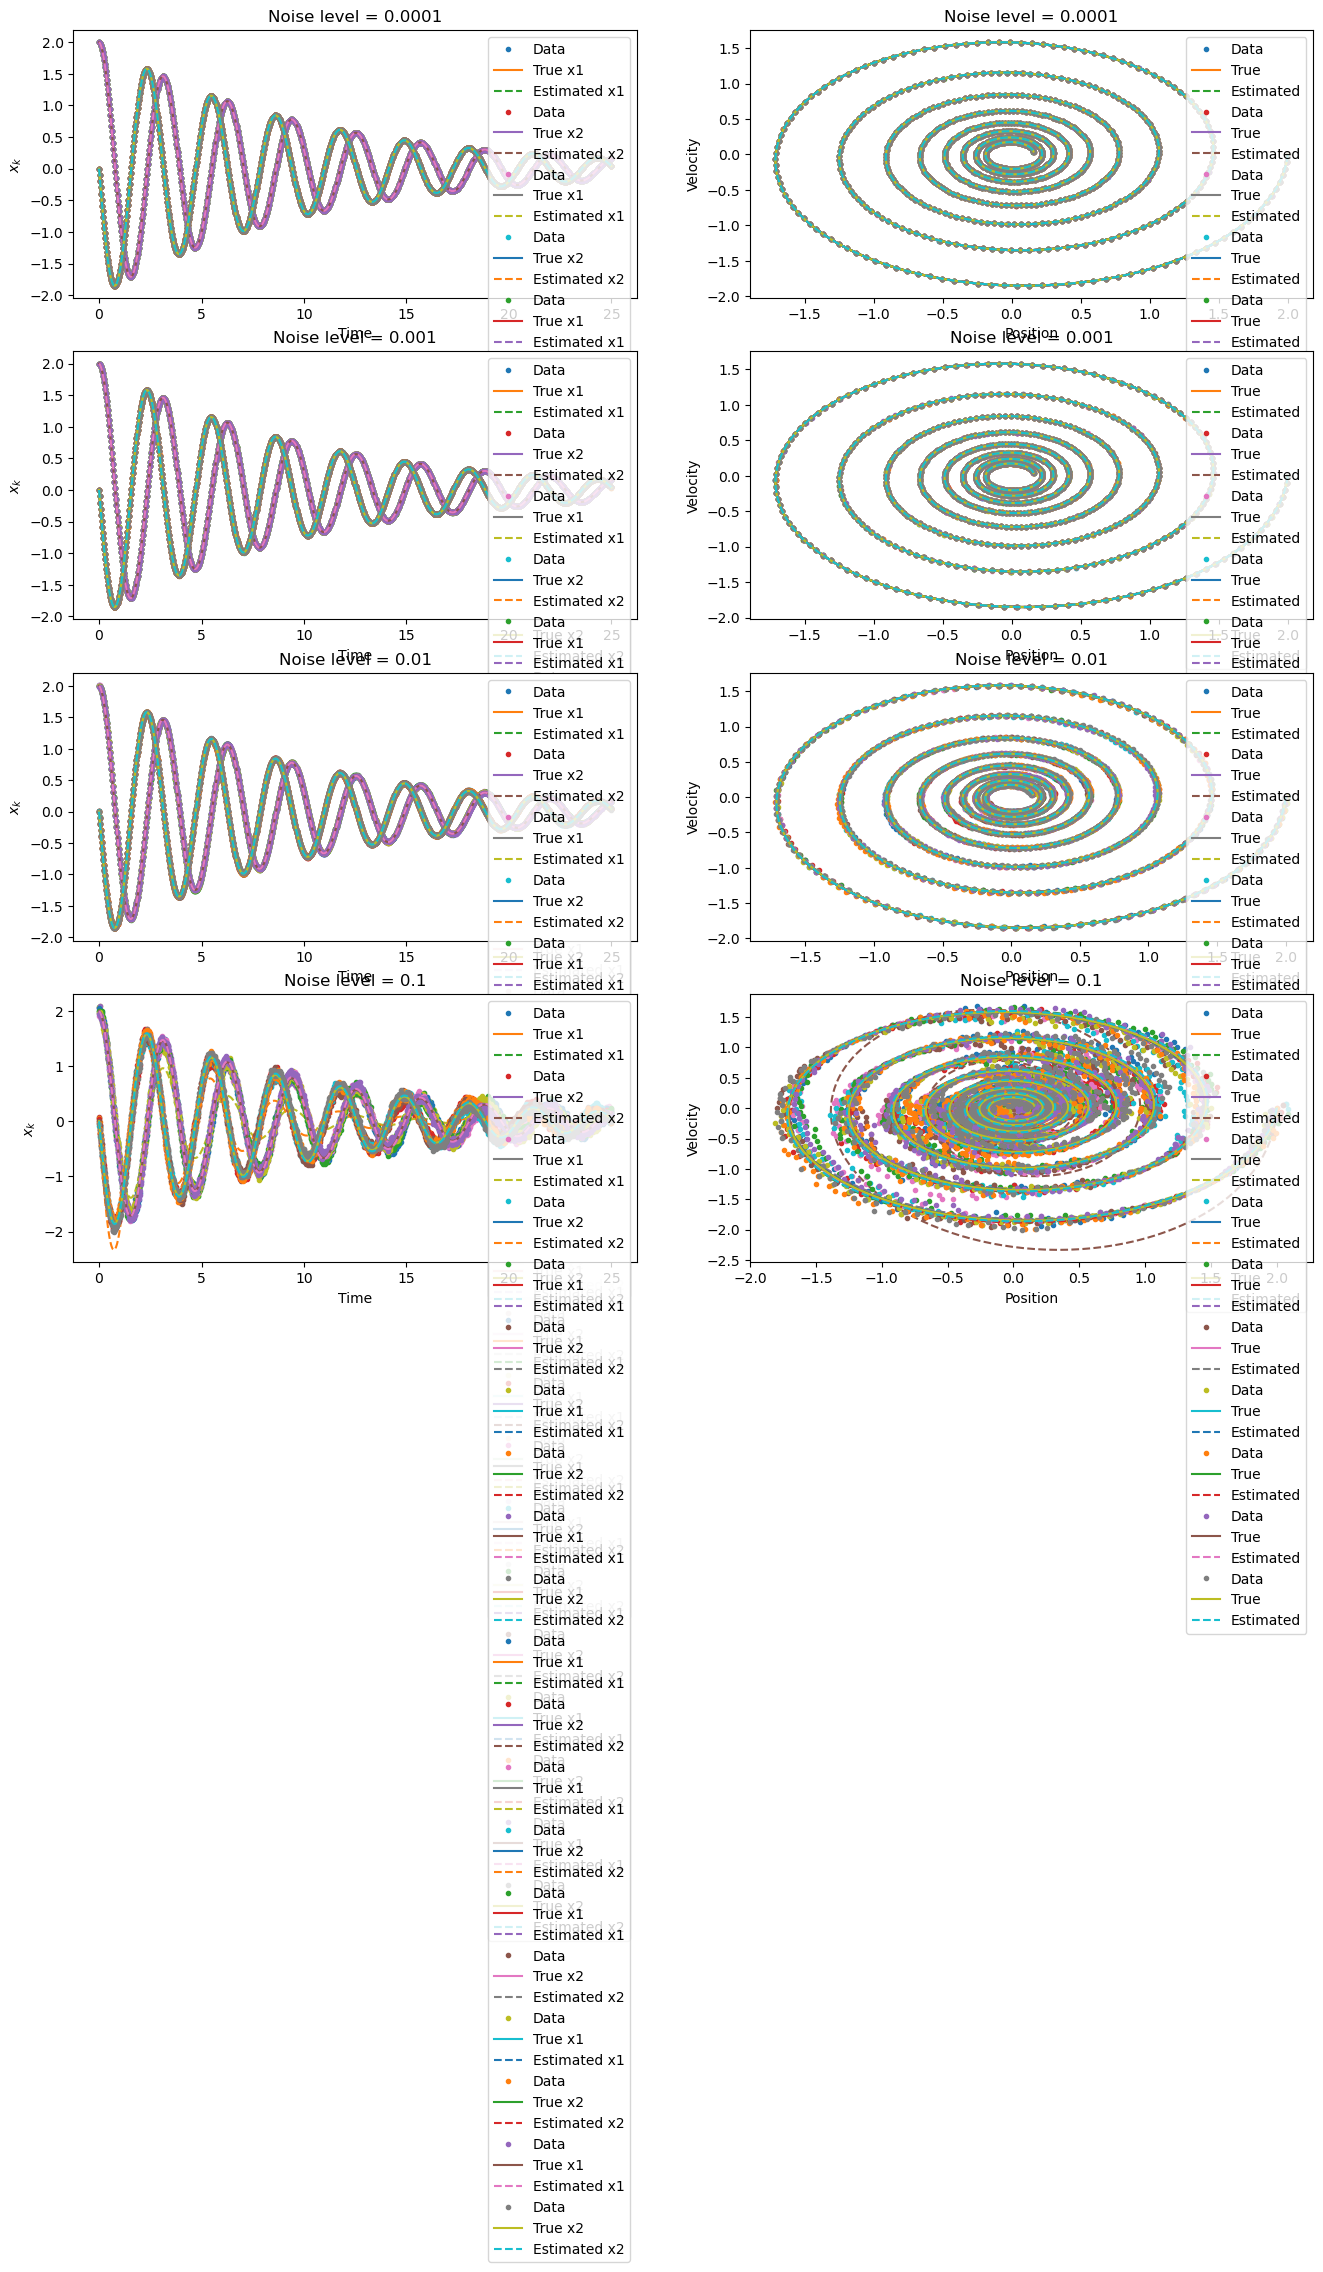

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt


# Define the function
def f(t, y, a, b, c, d):
    y1, y2 = y
    return np.array([a * y1 + b * y2, c * y1 + d * y2])


# Define the objective function
def objective(x, t, y_data):
    y0 = [2.0, 0.0]  # initial conditions
    sol = solve_ivp(lambda t, y: f(t, y, *x), [t[0], t[-1]], y0, t_eval=t)
    y_pred = sol.y
    return np.sum((y_data - y_pred) ** 2)


# Define parameters
a = -0.1
b = 2.0
c = -2
d = -0.1

t0 = 0.0
tmax = 25.0
y0 = np.array([2, 0])

# Generate noisy data for different noise levels
t = np.linspace(t0, tmax, 1000)

# Plot the results
fig, axs = plt.subplots(4, 2, figsize=(16, 16))
noises = [0.0001, 0.001, 0.01, 0.1]

num_iterations = 10
avg_a = np.zeros(num_iterations)
avg_b = np.zeros(num_iterations)
avg_c = np.zeros(num_iterations)
avg_d = np.zeros(num_iterations)
avg_mse = np.zeros(num_iterations)
avg_rmse = np.zeros(num_iterations)

for i in range(num_iterations):
    print(f"Iteration: {i+1}")
    mse_values = []
    rmse_values = []
    a_values = []
    b_values = []
    c_values = []
    d_values = []

    for j, noise in enumerate(noises):
        print(f"Noise: {noise}")
        y_true = solve_ivp(lambda t, y: f(t, y, a, b, c, d), [t0, tmax], y0, t_eval=t).y

        # Generate colored noise (pink noise)
        n = len(t)
        dt = t[1] - t[0]
        freq = np.fft.fftfreq(n, dt)
        power_spectrum = np.sqrt(1 / np.abs(freq))
        power_spectrum[0] = 0
        colored_noise = np.fft.ifft(np.fft.fft(np.random.normal(0, 1, n)) * power_spectrum).real

        desired_length = y_true.shape[1]  # Adjusted to match the length of the true solution
        y_data = y_true + noise * colored_noise

        # Estimate the parameters using the trust region method
        x0 = [-0.087, 1.85, -1.85, -0.088]  # initial guess for a, b, c, d
        res = minimize(lambda x: objective(x, t, y_data), x0, method='trust-constr',
                       bounds=[(-1, None), (-10, None), (-10, None), (-1, None)])
        a_opt, b_opt, c_opt, d_opt = res.x
        print(f"Optimized parameters: a={a_opt:.4f}, b={b_opt:.4f}, c={c_opt:.4f}, d={d_opt:.4f}")
        print(f"True parameters: a={a:.4f}, b={b:.4f}, c={c:.4f}, d={d:.4f}")

        # Solve the differential equation using the optimized parameters
        y0 = np.array([2.0, 0.0])  # initial conditions
        sol = solve_ivp(lambda t, y: f(t, y, a_opt, b_opt, c_opt, d_opt), [t0, tmax], y0, t_eval=t)

        # Compute the MSE and RMSE
        mse = np.mean((y_data - sol.y) ** 2)
        rmse = np.sqrt(mse)
        mse_values.append(mse)
        rmse_values.append(rmse)
        a_values.append(a_opt)
        b_values.append(b_opt)
        c_values.append(c_opt)
        d_values.append(d_opt)
        print(f"MSE: {mse:.4f}")
        print(f"RMSE: {rmse:.4f}")

        # Plot the results
        axs[j, 0].plot(t, y_data[0], '.', label='Data')
        axs[j, 0].plot(t, y_true[0], '-', label='True x1')
        axs[j, 0].plot(t, sol.y[0], '--', label='Estimated x1')
        axs[j, 0].plot(t, y_data[1], '.', label='Data')
        axs[j, 0].plot(t, y_true[1], '-', label='True x2')
        axs[j, 0].plot(t, sol.y[1], '--', label='Estimated x2')
        axs[j, 0].set_xlabel('Time')
        axs[j, 0].set_ylabel('$x_{k}$')
        axs[j, 0].set_title(f"Noise level = {noise}")
        axs[j, 0].legend()

        axs[j, 1].plot(y_data[0], y_data[1], '.', label='Data')
        axs[j, 1].plot(y_true[0], y_true[1], '-', label='True')
        axs[j, 1].plot(sol.y[0], sol.y[1], '--', label='Estimated')
        axs[j, 1].set_title(f"Noise level = {noise}")
        axs[j, 1].set_xlabel('Position')
        axs[j, 1].set_ylabel('Velocity')
        axs[j, 1].legend()

    avg_mse[i] = np.mean(mse_values)
    avg_rmse[i] = np.mean(rmse_values)
    avg_a[i] = np.mean(a_values)
    avg_b[i] = np.mean(b_values)
    avg_c[i] = np.mean(c_values)
    avg_d[i] = np.mean(d_values)

print(f"Average MSE: {np.mean(avg_mse):.4f}")
print(f"Average RMSE: {np.mean(avg_rmse):.4f}")
print(f"Average estimated parameters:")
print(f"a: {np.mean(avg_a):.4f}")
print(f"b: {np.mean(avg_b):.4f}")
print(f"c: {np.mean(avg_c):.4f}")
print(f"d: {np.mean(avg_d):.4f}")

plt.tight_layout()
plt.show()
